In [12]:
#importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('DATA.csv')

In [8]:
## check the shape of our data
data.shape

(36048, 2)

In [9]:
data.head()

,Rating,Reviews
0,5,Great Phone at this Price point. Superb cool D...
1,4,"Good mobile poco m3\nPros:\nFullhd display,\ns..."
2,5,Good phone battery🔋 And camera This price poin...
3,5,U will never get this specs for this price...d...
4,5,"One word review "" Value for Money""\nIt has the..."


In [11]:
data.isnull().sum()

Rating     0
Reviews    0
dtype: int64

from the above verificaion we can see that there no missing values in our dataset

## Text Preprocessing

#### The preprocessing involves following changes on our dataset.

1) URLs, as the people tend to spam the section with irrelevant urls, we need to get rid of those for better modelling.

2) Numbers and Punctuation: We don't need those as they hardly add up any info in the end.

3) Converting the text into lowercase as it will bring the uniform nature to it.

4) Tokenize the data to:

i) Remove stopwords (The words which don't add up anymore than the rest.)

ii) Stemming and Lammatization (Methods to reduce the noise and extra info from the data)

iii) Remove the words having length <= 2

5) Convert the list of tokens into back to the string

### 1) Removing URLs

In [13]:
import re

def clean_url(review_text):
    return re.sub(r'http\S+', '', review_text) #The format of the websites are cliche, those can be removed if we figure how they are structured in general.

data['cleanreview'] = data['Reviews'].apply(clean_url)

In [14]:
data['cleanreview']

0        Great Phone at this Price point. Superb cool D...
1        Good mobile poco m3\nPros:\nFullhd display,\ns...
2        Good phone battery🔋 And camera This price poin...
3        U will never get this specs for this price...d...
4        One word review " Value for Money"\nIt has the...
                               ...                        
36043                            Very nice.quality product
36044    Bad product. Not working after one month. Swit...
36045                        it's beautiful. as I expected
36046                     good quality. but it's too long.
36047             gives a natural look, very good purchase
Name: cleanreview, Length: 36048, dtype: object

### 2) Numbers and Punctuations off the data

In [16]:
def cleandata(review_text):
    return re.sub('[^a-zA-Z]', ' ', review_text) #It removes [!”#$%...] such punctuations and [0-9] numbers

data['cleanreview'] = data['cleanreview'].apply(cleandata)

### 3) Convert to LowerCase

In [19]:
def lowercase(review_text):
    return str(review_text).lower()

data['cleanreview'] = data['cleanreview'].apply(lowercase)

In [20]:
data['cleanreview']

0        great phone at this price point  superb cool d...
1        good mobile poco m  pros  fullhd display  smoo...
2        good phone battery  and camera this price poin...
3        u will never get this specs for this price   d...
4        one word review   value for money  it has the ...
                               ...                        
36043                            very nice quality product
36044    bad product  not working after one month  swit...
36045                        it s beautiful  as i expected
36046                     good quality  but it s too long 
36047             gives a natural look  very good purchase
Name: cleanreview, Length: 36048, dtype: object

#### All the capital letters have been converted to lower case. Great.

In [21]:
## import Ntuaral language Toolkit

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/oliverla412/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 4) Tokenization

In [22]:
from nltk.tokenize import word_tokenize

def token(review_text):
    return word_tokenize(review_text)

In [23]:
data['cleanreview'] = data['cleanreview'].apply(token)

In [24]:
data

,Rating,Reviews,cleanreview
0,5,Great Phone at this Price point. Superb cool D...,"[great, phone, at, this, price, point, superb,..."
1,4,"Good mobile poco m3\nPros:\nFullhd display,\ns...","[good, mobile, poco, m, pros, fullhd, display,..."
2,5,Good phone battery🔋 And camera This price poin...,"[good, phone, battery, and, camera, this, pric..."
3,5,U will never get this specs for this price...d...,"[u, will, never, get, this, specs, for, this, ..."
4,5,"One word review "" Value for Money""\nIt has the...","[one, word, review, value, for, money, it, has..."
...,...,...,...
36043,5,Very nice.quality product,"[very, nice, quality, product]"
36044,5,Bad product. Not working after one month. Swit...,"[bad, product, not, working, after, one, month..."
36045,5,it's beautiful. as I expected,"[it, s, beautiful, as, i, expected]"
36046,5,good quality. but it's too long.,"[good, quality, but, it, s, too, long]"


#### We've split the cleanreview text into seperate words called as tokens as we can see above, great.

##### i) Removing Stopwords

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliverla412/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def cleantext(token):
    return [word for word in token if word not in stop_words]

data['cleanreview'] = data['cleanreview'].apply(cleantext)

In [27]:
data['cleanreview']

0        [great, phone, price, point, superb, cool, des...
1        [good, mobile, poco, pros, fullhd, display, sm...
2        [good, phone, battery, camera, price, point, g...
3        [u, never, get, specs, price, decent, buy, pos...
4        [one, word, review, value, money, potential, n...
                               ...                        
36043                             [nice, quality, product]
36044    [bad, product, working, one, month, switch, qu...
36045                                [beautiful, expected]
36046                                [good, quality, long]
36047               [gives, natural, look, good, purchase]
Name: cleanreview, Length: 36048, dtype: object

#### Now we have removed the stop words which don't extra meaning to the sentence

### ii) Stemming and Lemmatization


To put things straight and simple:

Stemming: It is a direct and raw process which does not go by the dictionary while it perfroms its action on the tokens. The processed tokens do not really mean anything in the end but it makes sure to rip the long words into short.

Lemmatization: It is a time taking process but it is well composed and goes by the dictionary. Post-processed tokens do mean something in the end.

We'd use Lemmatization as it yield a sensible and reilable result in the end comparatively.

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/oliverla412/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def cleantext(token):
    return [lemma.lemmatize(word = w, pos = 'v') for w in token] #POS = Parts of speach, 'v' = verb.

data['cleanreview'] = data['cleanreview'].apply(cleantext)

In [31]:
data

,Rating,Reviews,cleanreview
0,5,Great Phone at this Price point. Superb cool D...,"[great, phone, price, point, superb, cool, des..."
1,4,"Good mobile poco m3\nPros:\nFullhd display,\ns...","[good, mobile, poco, pros, fullhd, display, sm..."
2,5,Good phone battery🔋 And camera This price poin...,"[good, phone, battery, camera, price, point, g..."
3,5,U will never get this specs for this price...d...,"[u, never, get, specs, price, decent, buy, pos..."
4,5,"One word review "" Value for Money""\nIt has the...","[one, word, review, value, money, potential, n..."
...,...,...,...
36043,5,Very nice.quality product,"[nice, quality, product]"
36044,5,Bad product. Not working after one month. Swit...,"[bad, product, work, one, month, switch, quali..."
36045,5,it's beautiful. as I expected,"[beautiful, expect]"
36046,5,good quality. but it's too long.,"[good, quality, long]"


The column 'cleanreview' clearly got rid of the words which are nothing but a burden. Now it only has which makes sense.

### iii) Remove the words having length <= 2

There is a chance of having a single letter like 'a', 'I'.. which donot add up much in the end

In [32]:
def clean_length(token):
    return [word for word in token if len(word)>2]

data['cleanreview'] = data['cleanreview'].apply(clean_length)

In [33]:
data

,Rating,Reviews,cleanreview
0,5,Great Phone at this Price point. Superb cool D...,"[great, phone, price, point, superb, cool, des..."
1,4,"Good mobile poco m3\nPros:\nFullhd display,\ns...","[good, mobile, poco, pros, fullhd, display, sm..."
2,5,Good phone battery🔋 And camera This price poin...,"[good, phone, battery, camera, price, point, g..."
3,5,U will never get this specs for this price...d...,"[never, get, specs, price, decent, buy, positi..."
4,5,"One word review "" Value for Money""\nIt has the...","[one, word, review, value, money, potential, n..."
...,...,...,...
36043,5,Very nice.quality product,"[nice, quality, product]"
36044,5,Bad product. Not working after one month. Swit...,"[bad, product, work, one, month, switch, quali..."
36045,5,it's beautiful. as I expected,"[beautiful, expect]"
36046,5,good quality. but it's too long.,"[good, quality, long]"


### 5) Snitching the tokens back to the string

In [34]:
## let's drop Review column first


data.drop(['Reviews'], axis = 1, inplace = True)

We've removed the raw 'Review' column to model the rest of the data.

In [36]:
def convert(review):
    return ' '.join(review)

data['cleanreview'] = data['cleanreview'].apply(convert)

In [37]:
data

,Rating,cleanreview
0,5,great phone price point superb cool design goo...
1,4,good mobile poco pros fullhd display smooth to...
2,5,good phone battery camera price point good pho...
3,5,never get specs price decent buy positives per...
4,5,one word review value money potential nice cas...
...,...,...
36043,5,nice quality product
36044,5,bad product work one month switch quality also...
36045,5,beautiful expect
36046,5,good quality long


### Now the data is properly has undergone the preprocessing procedure, it is now ready for building a model.

##  data Visualization using Ploting

No handles with labels found to put in legend.


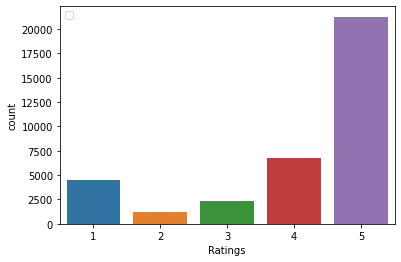

In [38]:
sns.countplot(data.Rating)
plt.xlabel('Ratings')
plt.show()


The plot shows that the distribution is imblalanced thus
we shall assign negative,neutral to < 3, = 3
and positive sentiments > 3 respectively.

In [39]:
# replacing numerical values with categorical values to reduce the classes to sentiments

data['sentiment'] = data.Rating.replace({
    1:'negative',
    2:'negative',
    3:'neutral',
    4:'positive',
    5:'positive'
})

## Now let's split our dataset 

In [40]:
# Creating Train and Test datasets

X_data = data['cleanreview']
y_data = data['sentiment']

In [41]:
y_data 

0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
36043    positive
36044    positive
36045    positive
36046    positive
36047    positive
Name: sentiment, Length: 36048, dtype: object

In [42]:
X_data

0        great phone price point superb cool design goo...
1        good mobile poco pros fullhd display smooth to...
2        good phone battery camera price point good pho...
3        never get specs price decent buy positives per...
4        one word review value money potential nice cas...
                               ...                        
36043                                 nice quality product
36044    bad product work one month switch quality also...
36045                                     beautiful expect
36046                                    good quality long
36047                      give natural look good purchase
Name: cleanreview, Length: 36048, dtype: object

In [43]:
# changing the datatype from object to string

X_data = X_data.astype(str)
X_data

0        great phone price point superb cool design goo...
1        good mobile poco pros fullhd display smooth to...
2        good phone battery camera price point good pho...
3        never get specs price decent buy positives per...
4        one word review value money potential nice cas...
                               ...                        
36043                                 nice quality product
36044    bad product work one month switch quality also...
36045                                     beautiful expect
36046                                    good quality long
36047                      give natural look good purchase
Name: cleanreview, Length: 36048, dtype: object

In [44]:
# creating new dataframe

X_data_df = pd.DataFrame(data=X_data)
X_data_df.columns = ['review']
X_data_df.head()

,review
0,great phone price point superb cool design goo...
1,good mobile poco pros fullhd display smooth to...
2,good phone battery camera price point good pho...
3,never get specs price decent buy positives per...
4,one word review value money potential nice cas...


Since the reviews are converted to string datatype, we'll then convert it into numerical so that the machine can model the data.

We use CountVector and TfidfTransoformer to breakdown the texts and then coverting those numerical form.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv=CountVectorizer()

x_train_trans1=cv.fit_transform(X_data).toarray()

tfidf = TfidfTransformer()

x_final_trans = tfidf.fit_transform(x_train_trans1).toarray()

In [46]:
from sklearn.model_selection import train_test_split
seed = 4353

X_train,X_test,y_train,y_test=train_test_split(x_final_trans,y_data,random_state = seed,test_size=0.2)


## Model Building Selection


### Multinomial Naive Bayes

In [55]:
## conda install py-xgboost
## conda install -c conda-forge xgboost

Using pip 21.3.1 from /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pip (python 3.9)


In [66]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#import xgboost as xgb
seed = 4353

In [67]:
# Instatiation, fitting and prediction

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predictions = MNB.predict(X_test)

In [70]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    negative       0.35      0.01      0.01      1124
     neutral       1.00      0.00      0.00       483
    positive       0.78      1.00      0.87      5603

    accuracy                           0.78      7210
   macro avg       0.71      0.34      0.30      7210
weighted avg       0.73      0.78      0.68      7210

[[   6    0 1118]
 [   1    1  481]
 [  10    0 5593]]
Accuracy :  77.67  %
f1_score :  0.681


### RandomForestClassifer

In [71]:
# Instatiation, fitting and predictions

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= seed)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

In [72]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

rfc_f1 = round(f1_score(y_test, predictions, average= 'weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)

print("Accuracy : " , rfc_accuracy ,"%")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

    negative       0.33      0.09      0.15      1124
     neutral       0.34      0.07      0.11       483
    positive       0.79      0.96      0.86      5603

    accuracy                           0.76      7210
   macro avg       0.49      0.37      0.37      7210
weighted avg       0.69      0.76      0.70      7210

[[ 106   10 1008]
 [  22   32  429]
 [ 196   51 5356]]
Accuracy :  76.2  %
f1_score :  0.702


### The RandomForestClassifer Accuracy is : 76%

### LSTM - Neural Networks

We can apply Sequential API on the data and find out the accuracy for each iteration (EPOCH). This neural network concept comes in handy when we there's a huge data to process.

In [75]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
max_words=5000

model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=X_train.shape[1]))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))

print(model.summary())


2021-11-16 23:53:21.863788: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 9984, 32)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [77]:
## converting categorical variables in y_train to numerical variables

y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (28838, 3)


In [78]:
#train the model

model.fit(X_train, y_train_dummies, epochs=5, batch_size=32)

2021-11-16 23:55:48.720328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
902/902 [==============================] - 9302s 10s/step - loss: 0.6691 - accuracy: 0.7777
Epoch 2/5
902/902 [==============================] - 9280s 10s/step - loss: 0.6640 - accuracy: 0.7785
Epoch 3/5
902/902 [==============================] - 7995s 9s/step - loss: 0.6636 - accuracy: 0.7785
Epoch 4/5
902/902 [==============================] - 30687s 34s/step - loss: 0.6633 - accuracy: 0.7785
Epoch 5/5
902/902 [==============================] - 8160s 9s/step - loss: 0.6629 - accuracy: 0.7785


### The accuracy of LSTM using Sequentical API gives it around 0.77 which is equal to 77%.

In [79]:
## import the libraries

from sklearn.tree import DecisionTreeClassifier

In [80]:
### DecisionTreeClassifier model.

dt = DecisionTreeClassifier(random_state=365)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("The Accuracy is :",accuracy_score(y_test, pred_dt))
print('--'*20)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))

The Accuracy is : 0.7325936199722608
----------------------------------------
[[ 160   19  945]
 [  43   42  398]
 [ 382  141 5080]]
              precision    recall  f1-score   support

    negative       0.27      0.14      0.19      1124
     neutral       0.21      0.09      0.12       483
    positive       0.79      0.91      0.84      5603

    accuracy                           0.73      7210
   macro avg       0.42      0.38      0.38      7210
weighted avg       0.67      0.73      0.69      7210



### DecisionTreeClassifier Accuracy is : 73%

## In conclusion we can say our best model is LSTM which gives 77% accuracy

#### Saving the model.

In [84]:
model.save('Rating_Prediction_Model.h5')


## End of the project..